In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import re

perf_metric_idx = 2
# pool versus stream
# standard active learning, random selection, oracle as feature extractor
pool_al_dir = 'al_step_checkpoints/methodKMeansSampling_ratio0.5-MMBody-PointTransformer-2024-12-20_13-20-10'
pool_random_dir = 'random_checkpoints'
pool_oracle_dir = 'oracle_checkpoints'
stream_al_dir = 'al_stream_step_checkpoints/methodKMeansSampling_ratio0.5-MMBody-PointTransformer-2024-12-20_21-03-38'
stream_random_dir = 'stream_random_checkpoints/seed420-MMBody-PointTransformer-2024-12-22_19-24-38'
stream_oracle_dir = 'stream_oracle_checkpoints/new_ratio0.5-MMBody-PointTransformer-2024-12-22_19-39-25'

mmbody_all_perf = [70.5222, 53.7661][perf_metric_idx-1]

In [2]:
def extract_number_from_string(s):
    match = re.search(r'[a-zA-Z](\d*\.?\d+)', s)
    if match:
        number = float(match.group(1))
        return number
    else:
        return None

In [3]:
pool_al_dict = {}
stream_al_dict = {}
for i in range(5, 100, 5):
    pool_al_dict[i] = 0
    stream_al_dict[i] = 0

pool_files = os.listdir(pool_al_dir)
for pool_fname in pool_files:
    if not pool_fname.endswith('.pth'):
        continue
    fname_list = pool_fname[:-4].split('_')
    cur_epoch = extract_number_from_string(fname_list[0])
    cur_res = extract_number_from_string(fname_list[perf_metric_idx])
    pool_al_dict[cur_epoch] = cur_res

stream_files = os.listdir(stream_al_dir)
for stream_fname in stream_files:
    if not stream_fname.endswith('.pth'):
        continue
    fname_list = stream_fname[:-4].split('_')
    cur_epoch = extract_number_from_string(fname_list[0])
    cur_res = extract_number_from_string(fname_list[perf_metric_idx])
    stream_al_dict[cur_epoch] = cur_res

for i in range(5, 100, 5):
    k = 1
    while pool_al_dict[i] == 0:
        pool_al_dict[i] = pool_al_dict[i-5*k]
        k += 1
    if i > 5 and pool_al_dict[i] > pool_al_dict[i-5]:
        pool_al_dict[i] = pool_al_dict[i-5]
    k = 1
    while stream_al_dict[i] == 0:
        stream_al_dict[i] = stream_al_dict[i-5*k]
        k += 1
    if i > 5 and stream_al_dict[i] > stream_al_dict[i-5]:
        stream_al_dict[i] = stream_al_dict[i-5]


print(pool_al_dict)
print(stream_al_dict)

{5: 71.9419, 10: 62.2208, 15: 62.2208, 20: 59.0861, 25: 58.704, 30: 58.1763, 35: 58.1763, 40: 57.9494, 45: 57.9494, 50: 56.1998, 55: 56.1998, 60: 56.0795, 65: 55.0277, 70: 55.0277, 75: 55.0277, 80: 55.0277, 85: 55.0277, 90: 55.0277, 95: 55.0277}
{5: 88.2469, 10: 79.5439, 15: 79.5439, 20: 76.543, 25: 73.5182, 30: 73.5182, 35: 73.5182, 40: 73.5182, 45: 73.5182, 50: 72.8809, 55: 69.2104, 60: 66.9857, 65: 65.3823, 70: 61.8736, 75: 59.3664, 80: 58.2981, 85: 57.8607, 90: 57.8607, 95: 56.64}


In [4]:
pool_random_dict = {}
stream_random_dict = {}
for i in range(5, 100, 5):
    pool_random_dict[i] = []
    stream_random_dict[i] = 0
    
pool_random_files = [f for f in os.listdir(pool_random_dir) if 'MMBody' in f]

for random_fname in pool_random_files:
    fname_list = random_fname.split('-')
    ratio = float(fname_list[0].split('_')[0][5:])
    cur_epoch = int((ratio+1e-3) / 0.025 * 5)
    if cur_epoch not in pool_random_dict:
        continue
    cur_res_files = os.listdir(os.path.join(pool_random_dir, random_fname))
    for res_fname in cur_res_files:
        if not res_fname.endswith('.pth'):
            continue
        res_fname_list = res_fname[:-4].split('_')
        cur_res = extract_number_from_string(res_fname_list[perf_metric_idx])
        pool_random_dict[cur_epoch].append(cur_res)

stream_files = os.listdir(stream_random_dir)
for stream_fname in stream_files:
    if not stream_fname.endswith('.pth'):
        continue
    fname_list = stream_fname[:-4].split('_')
    cur_epoch = extract_number_from_string(fname_list[0])
    cur_res = extract_number_from_string(fname_list[perf_metric_idx])
    stream_random_dict[cur_epoch] = cur_res

for i in range(5, 100, 5):
    if len(pool_random_dict[i]) == 0:
        pool_random_dict[i] = 0
    else:
        pool_random_dict[i] = np.mean(pool_random_dict[i])

for i in range(5, 100, 5):
    k = 1
    while pool_random_dict[i] == 0:
        pool_random_dict[i] = pool_random_dict[i-5*k]
        k += 1
    k = 1
    while stream_random_dict[i] == 0:
        stream_random_dict[i] = stream_random_dict[i-5*k]
        k += 1
    if i > 5 and stream_random_dict[i] > stream_random_dict[i-5]:
        stream_random_dict[i] = stream_random_dict[i-5]

print(pool_random_dict)
print(stream_random_dict)

{5: 69.73268, 10: 64.37502, 15: 61.81197999999999, 20: 61.32876, 25: 60.24316, 30: 60.88474, 35: 59.538, 40: 58.90944, 45: 58.163959999999996, 50: 59.450239999999994, 55: 58.46576, 60: 58.498239999999996, 65: 59.74646, 70: 58.32374, 75: 57.57012000000001, 80: 57.38956, 85: 57.0543, 90: 57.356899999999996, 95: 56.97986000000001}
{5: 84.958, 10: 77.39, 15: 77.39, 20: 73.6632, 25: 72.651, 30: 72.651, 35: 72.651, 40: 72.651, 45: 72.651, 50: 67.1169, 55: 67.1169, 60: 60.3727, 65: 60.3727, 70: 58.6938, 75: 58.6938, 80: 57.0203, 85: 57.0203, 90: 57.0203, 95: 57.0203}


In [5]:
pool_oracle_dict = {}
stream_oracle_dict = {}
for i in range(5, 100, 5):
    pool_oracle_dict[i] = []
    stream_oracle_dict[i] = 0
    
pool_oracle_files = [f for f in os.listdir(pool_oracle_dir) if 'MMBody' in f]

for oracle_fname in pool_oracle_files:
    fname_list = oracle_fname.split('-')
    ratio = float(fname_list[0].split('_')[0][5:])
    cur_epoch = int((ratio+1e-3) / 0.025 * 5)
    if cur_epoch not in pool_oracle_dict:
        continue
    cur_res_files = os.listdir(os.path.join(pool_oracle_dir, oracle_fname))
    for res_fname in cur_res_files:
        if not res_fname.endswith('.pth'):
            continue
        res_fname_list = res_fname[:-4].split('_')
        cur_res = extract_number_from_string(res_fname_list[perf_metric_idx])
        pool_oracle_dict[cur_epoch].append(cur_res)
        print(ratio, cur_epoch, cur_res)

stream_files = os.listdir(stream_oracle_dir)
for stream_fname in stream_files:
    if not stream_fname.endswith('.pth'):
        continue
    fname_list = stream_fname[:-4].split('_')
    cur_epoch = extract_number_from_string(fname_list[0])
    cur_res = extract_number_from_string(fname_list[perf_metric_idx])
    stream_oracle_dict[cur_epoch] = cur_res

for i in range(5, 100, 5):
    if len(pool_oracle_dict[i]) == 0:
        pool_oracle_dict[i] = 0
    else:
        pool_oracle_dict[i] = np.mean(pool_oracle_dict[i])

for i in range(5, 100, 5):
    k = 1
    while pool_oracle_dict[i] == 0:
        pool_oracle_dict[i] = pool_oracle_dict[i-5*k]
        k += 1
    k = 1
    while stream_oracle_dict[i] == 0:
        stream_oracle_dict[i] = stream_oracle_dict[i-5*k]
        k += 1
    if i > 5 and stream_oracle_dict[i] > stream_oracle_dict[i-5]:
        stream_oracle_dict[i] = stream_oracle_dict[i-5]

print(pool_oracle_dict)
print(stream_oracle_dict)

0.3 60 57.3303
0.4 80 57.7677
0.275 55 60.097
0.025 5 72.1364
0.325 65 59.1686
0.15 30 58.8884
0.05 10 65.3495
0.1 20 64.4515
0.25 50 59.1938
0.35 70 56.7712
0.125 25 59.0212
0.175 35 58.7711
0.225 45 57.2945
0.2 40 58.6738
0.475 95 64.8787
0.375 75 56.6947
0.425 85 57.0023
0.45 90 59.5141
0.075 15 64.3338
{5: 72.1364, 10: 65.3495, 15: 64.3338, 20: 64.4515, 25: 59.0212, 30: 58.8884, 35: 58.7711, 40: 58.6738, 45: 57.2945, 50: 59.1938, 55: 60.097, 60: 57.3303, 65: 59.1686, 70: 56.7712, 75: 56.6947, 80: 57.7677, 85: 57.0023, 90: 59.5141, 95: 64.8787}
{5: 88.9325, 10: 78.4261, 15: 77.8642, 20: 74.381, 25: 72.1838, 30: 72.1838, 35: 72.1838, 40: 72.1838, 45: 72.1838, 50: 70.3576, 55: 68.8852, 60: 61.2814, 65: 61.2814, 70: 58.4367, 75: 58.4367, 80: 55.4874, 85: 55.4874, 90: 55.4874, 95: 55.4874}


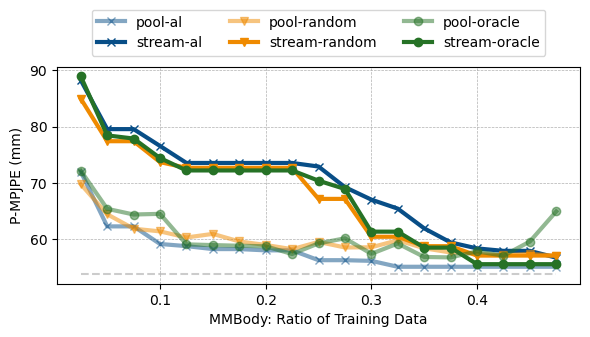

In [6]:
# plot the performance of different methods
plt.figure(figsize=(6, 3.5))
ax = plt.subplot()
colors = ['#084E87', '#ef8a00', '#267226', '#BF3F3F', '#414141', "#282828"]
x = np.array(list(pool_al_dict.keys()))
x = [i/100*0.5 for i in x]
pool_al_y = np.array(list(pool_al_dict.values()))
stream_al_y = np.array(list(stream_al_dict.values()))
pool_random_y = np.array(list(pool_random_dict.values()))
stream_random_y = np.array(list(stream_random_dict.values()))
pool_oracle_y = np.array(list(pool_oracle_dict.values()))
stream_oracle_y = np.array(list(stream_oracle_dict.values()))

plt.plot(x, pool_al_y, '-', marker = 'x', markersize=6, linewidth=3, color=colors[0], alpha=0.5, label='pool-al')
plt.plot(x, stream_al_y, '-', marker = 'x', markersize=6, linewidth=3, color=colors[0], label='stream-al')
plt.plot(x, pool_random_y, '-', marker = 'v', markersize=6, linewidth=3, color=colors[1], alpha=0.5, label='pool-random')
plt.plot(x, stream_random_y, '-', marker = 'v', markersize=6, linewidth=3, color=colors[1], label='stream-random')
plt.plot(x, pool_oracle_y, '-', marker = 'o', markersize=6, linewidth=3, color=colors[2], alpha=0.5, label='pool-oracle')
plt.plot(x, stream_oracle_y, '-', marker = 'o', markersize=6, linewidth=3, color=colors[2], label='stream-oracle')

mmbody_all_y = mmbody_all_perf * np.ones_like(x)
plt.plot(x, mmbody_all_y, '--', color='grey', marker='None', zorder=10, linewidth=1.5, alpha=0.4)

plt.xlabel('MMBody: Ratio of Training Data')
plt.ylabel('P-MPJPE (mm)', verticalalignment='bottom')
plt.grid(linestyle='--', linewidth=0.5, zorder=0)
ax.legend(
    bbox_to_anchor=(0.5, 1.05),
    loc='lower center',
    ncol=3,
    borderaxespad=0, 
)
plt.tight_layout()
plt.show()